# Haiti Roads Data


Let's start by importing the required modules

In [1]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from pyproj import CRS
%matplotlib inline
import seaborn as sns
import folium

# Data Scource 1: OpenStreetMap (OSM)

When fetching netowrk data from OpenStreetMap using OSMnx, it is possible to define the type of street network using the `network_type` parameter (options: `drive`, `walk` and `bike`).
Let's download the OSM data from Haiti but this only the drivable network. Alternatively, you can also fetch the walkable network (this will take a bit longer time). 

Now we have retrieved only such streets where it is possible to drive with a car. Let's confirm
this by taking a look at the attributes of the street network. Easiest way to do this is to convert the
graph (nodes and edges) into GeoDataFrames.

Converting graph into a GeoDataFrame can be done with function `graph_to_gdfs()` that we already used in previous tutorial. With parameters `nodes` and `edges`, it is possible to control whether to retrieve both nodes and edges from the graph. 

## Download OSM as Shapefile

In [2]:
import osmnx as ox
ox.config(use_cache=True, log_console=True)
gdf = ox.geocode_to_gdf('Haiti')
gdf.to_file('Haiti-OSM-shapefile')

In [4]:
gdf

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"MULTIPOLYGON (((-75.23846 18.39870, -75.23370 ...",20.218137,17.909929,-71.621746,-75.238462,257948040,relation,307829,19.139995,-72.357097,Haiti,boundary,administrative,0.799459


## Converting graph into a GeoDataFrame

In [4]:
# Define place name - Haiti
place_name = "Haiti"
graph = ox.graph_from_place(place_name, network_type='drive')
# Get the drivable (or walkable) network

In [28]:
# Plot the graph:
# fig, ax = ox.plot_graph(graph)

In [5]:
# Retrieve only edges from the graph
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

In [6]:
# Check columns
edges.columns

Index(['osmid', 'name', 'highway', 'oneway', 'length', 'geometry', 'ref',
       'bridge', 'maxspeed', 'tunnel', 'lanes', 'junction', 'access', 'width',
       'service', 'est_width'],
      dtype='object')

In [7]:
# Check crs
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Note that the CRS of the GeoDataFrame is be WGS84 (epsg: 4326).

In [8]:
edges.head()

osmid        name       highway  \
u         v          key                                                    
330451756 4427959448 0                 49224232    PS Hotel  unclassified   
          4433922263 0                446049875         NaN      tertiary   
          614473094  0    [446049875, 30018812]  Rue Capois      tertiary   
330451881 330462701  0                 48454003         NaN      tertiary   
          1045134597 0                 48454003         NaN      tertiary   

                          oneway   length  \
u         v          key                    
330451756 4427959448 0     False  234.299   
          4433922263 0     False  796.887   
          614473094  0     False  399.810   
330451881 330462701  0     False   85.521   
          1045134597 0     False   65.781   

                                                                   geometry  \
u         v          key                                                      
330451756 4427959448 0    LINESTRING (-73.91427 18.08219, -73.91437 18.0...   
          4433922263 0    LINESTRING (-73.91427 18.08219, -73.91392 18.0...   
          614473094  0    LINESTRING (-73.91427 18.08219, -73.91436 18.0...   
330451881 330462701  0    LINESTRING (-73.88924 18.19991, -73.88843 18.1...   
          1045134597 0    LINESTRING (-73.88924 18.19991, -73.88986 18.1...   

                          ref bridge maxspeed tunnel lanes junction access  \
u         v          key                                                     
330451756 4427959448 0    NaN    NaN      NaN    NaN   NaN      NaN    NaN   
          4433922263 0    NaN    NaN      NaN    NaN   NaN      NaN    NaN   
          614473094  0    NaN    NaN      NaN    NaN   NaN      NaN    NaN   
330451881 330462701  0    NaN    NaN      NaN    NaN   NaN      NaN    NaN   
          1045134597 0    NaN    NaN      NaN    NaN   NaN      NaN    NaN   

                         width service est_width  
u         v          key                          
330451756 4427959448 0     NaN     NaN       NaN  
          4433922263 0     NaN     NaN       NaN  
          614473094  0     NaN     NaN       NaN  
330451881 330462701  0     NaN     NaN       NaN  
          1045134597 0     NaN     NaN       NaN

Okey, so we have quite many columns in our GeoDataFrame. Most of the columns are fairly self-explanatory but the following table describes all of them.
Most of the attributes come directly from the OpenStreetMap, however, columns `u` and `v` are Networkx specific ids. You can click on the links to get more information about each attribute:


| Column                                                     | Description                 | Data type         |
|------------------------------------------------------------|-----------------------------|-------------------|
| [bridge](http://wiki.openstreetmap.org/wiki/Key:bridge)    | Bridge feature              | boolean           |
| geometry                                                   | Geometry of the feature     | Shapely.geometry  |
| [highway](http://wiki.openstreetmap.org/wiki/Key:highway)  | Tag for roads (road type)   | str / list        |
| [lanes](http://wiki.openstreetmap.org/wiki/Key:lanes)      | Number of lanes             | int (or nan)      |
| [lenght](http://wiki.openstreetmap.org/wiki/Key:length)    | Length of feature (meters)  | float             |
| [maxspeed](http://wiki.openstreetmap.org/wiki/Key:maxspeed)| maximum legal speed limit   | int /list         |
| [name](http://wiki.openstreetmap.org/wiki/Key:name)        | Name of the (street) element| str (or nan)      |
| [oneway](http://wiki.openstreetmap.org/wiki/Key:oneway)    | One way road                | boolean           |
| [osmid](http://wiki.openstreetmap.org/wiki/Node)           | Unique ids for the element  | list              |
| [u](http://ow.ly/bV8n30h7Ufm)                              | The first node of edge      | int               |
| [v](http://ow.ly/bV8n30h7Ufm)                              | The last node of edge       | int               |


# Perform Data Explotaroy Analysis

In [9]:
def basic_eda(df, datafile_name="Datafile name"):
    print(f"\n**************************",datafile_name,"******************************\n")
    print(f"Performing basic EDA on {datafile_name} dataset\n")
    print(f"* The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
    print("\n* First 10 rows of the dataset:\n")
    display(df.head(10))
    print("\n* Describing the dataset statistics:\n", )
    display(df.describe())
    print("\n* Fetching info of the dataset: \n")
    display(df.info())
#     print("\n* Check data distribution: ")
#     df.hist(figsize=(20,30))

In [10]:
df_edges = pd.DataFrame(edges)
basic_eda(df_edges, "Haiti Roads Data from OSM")


************************** Haiti Roads Data from OSM ******************************

Performing basic EDA on Haiti Roads Data from OSM dataset

* The dataset has 152587 rows and 16 columns.

* First 10 rows of the dataset:



osmid        name  \
u         v          key                                                 
330451756 4427959448 0                            49224232    PS Hotel   
          4433922263 0                           446049875         NaN   
          614473094  0               [446049875, 30018812]  Rue Capois   
330451881 330462701  0                            48454003         NaN   
          1045134597 0                            48454003         NaN   
          1119101817 0                            90150220         NaN   
330452405 4427509989 0                            30018737         NaN   
          331002056  0    [30018737, 446049869, 446049886]         NaN   
          4427493171 0              [445297829, 445297830]         NaN   
330452617 1028707878 0                [88580529, 30018782]         NaN   

                               highway  oneway    length  \
u         v          key                                   
330451756 4427959448 0    unclassified   False   234.299   
          4433922263 0        tertiary   False   796.887   
          614473094  0        tertiary   False   399.810   
330451881 330462701  0        tertiary   False    85.521   
          1045134597 0        tertiary   False    65.781   
          1119101817 0     residential   False   128.064   
330452405 4427509989 0        tertiary   False   884.614   
          331002056  0        tertiary   False  1073.377   
          4427493171 0    unclassified   False  1360.288   
330452617 1028707878 0    unclassified   False   870.946   

                                                                   geometry  \
u         v          key                                                      
330451756 4427959448 0    LINESTRING (-73.91427 18.08219, -73.91437 18.0...   
          4433922263 0    LINESTRING (-73.91427 18.08219, -73.91392 18.0...   
          614473094  0    LINESTRING (-73.91427 18.08219, -73.91436 18.0...   
330451881 330462701  0    LINESTRING (-73.88924 18.19991, -73.88843 18.1...   
          1045134597 0    LINESTRING (-73.88924 18.19991, -73.88986 18.1...   
          1119101817 0    LINESTRING (-73.88924 18.19991, -73.88948 18.2...   
330452405 4427509989 0    LINESTRING (-73.90388 18.06089, -73.90382 18.0...   
          331002056  0    LINESTRING (-73.90388 18.06089, -73.90407 18.0...   
          4427493171 0    LINESTRING (-73.90388 18.06089, -73.90384 18.0...   
330452617 1028707878 0    LINESTRING (-73.92935 18.10103, -73.92940 18.1...   

                          ref bridge maxspeed tunnel lanes junction access  \
u         v          key                                                     
330451756 4427959448 0    NaN    NaN      NaN    NaN   NaN      NaN    NaN   
          4433922263 0    NaN    NaN      NaN    NaN   NaN      NaN    NaN   
          614473094  0    NaN    NaN      NaN    NaN   NaN      NaN    NaN   
330451881 330462701  0    NaN    NaN      NaN    NaN   NaN      NaN    NaN   
          1045134597 0    NaN    NaN      NaN    NaN   NaN      NaN    NaN   
          1119101817 0    NaN    NaN      NaN    NaN   NaN      NaN    NaN   
330452405 4427509989 0    NaN    NaN      NaN    NaN   NaN      NaN    NaN   
          331002056  0    NaN    NaN      NaN    NaN   NaN      NaN    NaN   
          4427493171 0    NaN    NaN      NaN    NaN   NaN      NaN    NaN   
330452617 1028707878 0    NaN    NaN      NaN    NaN   NaN      NaN    NaN   

                         width service est_width  
u         v          key                          
330451756 4427959448 0     NaN     NaN       NaN  
          4433922263 0     NaN     NaN       NaN  
          614473094  0     NaN     NaN       NaN  
330451881 330462701  0     NaN     NaN       NaN  
          1045134597 0     NaN     NaN       NaN  
          1119101817 0     NaN     NaN       NaN  
330452405 4427509989 0     NaN     NaN       NaN  
          331002056  0     NaN     NaN       NaN  
          4427493171 0     NaN     NaN       Na


* Describing the dataset statistics:



,length
count,152587.000000
mean,269.573914
std,680.382941
min,0.184000
25%,53.813000
50%,103.627000
75%,218.378000
max,20938.837000



* Fetching info of the dataset: 

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 152587 entries, (330451756, 4427959448, 0) to (6772903293, 616036311, 0)
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   osmid      152587 non-null  object  
 1   name       60280 non-null   object  
 2   highway    152587 non-null  object  
 3   oneway     152587 non-null  bool    
 4   length     152587 non-null  float64 
 5   geometry   152587 non-null  geometry
 6   ref        10915 non-null   object  
 7   bridge     2354 non-null    object  
 8   maxspeed   1073 non-null    object  
 9   tunnel     18 non-null      object  
 10  lanes      4787 non-null    object  
 11  junction   182 non-null     object  
 12  access     429 non-null     object  
 13  width      54 non-null      object  
 14  service    2 non-null       object  
 15  est_width  4 non-null       object  
dtypes: bool(1), float64(1), geometry(1), object(13)


None

## Let's take a look what kind of features we have in the `highway` column:

In [14]:
print(edges['highway'].value_counts())

residential                      88924
unclassified                     40532
tertiary                          8694
secondary                         6538
primary                           5421
[unclassified, residential]        869
road                               700
living_street                      627
[tertiary, unclassified]            58
[road, unclassified]                38
[living_street, residential]        36
[road, residential]                 34
secondary_link                      33
tertiary_link                       19
primary_link                        18
[tertiary, residential]             14
[living_street, unclassified]       12
yes                                 10
[tertiary, road]                     2
[secondary, tertiary]                2
[yes, residential]                   2
[secondary, unclassified]            2
[secondary, residential]             2
Name: highway, dtype: int64


### You can process the retrieved data with any tool of your choice (Pandas in our case) or visualize your data with any of the Python libraries. Let us say we want to get the bar chart of street types. The following process is just pure pandas functionality with seaborn data visualisation.

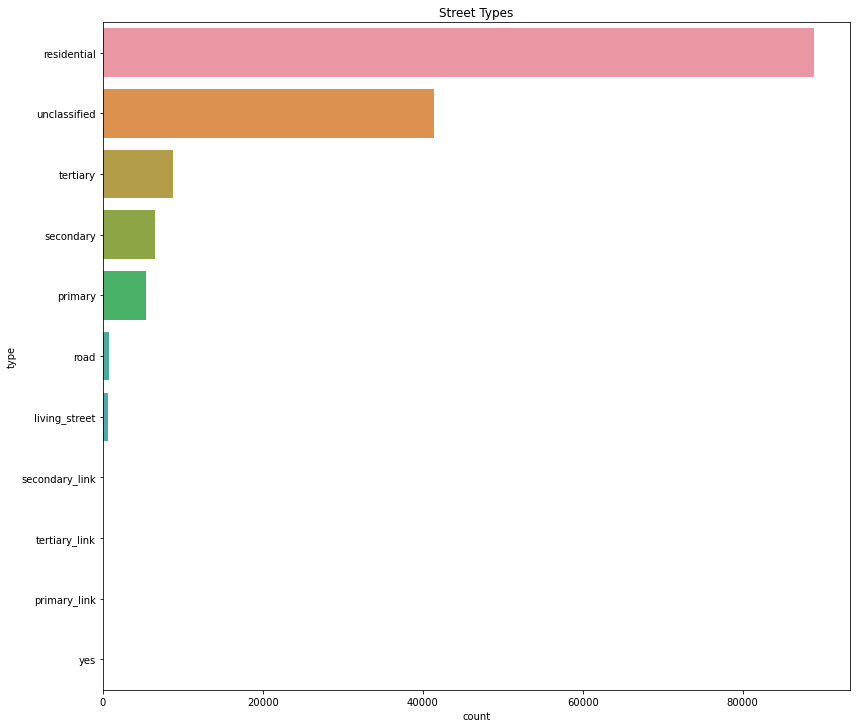

In [15]:
street_types = pd.DataFrame(edges["highway"].apply(pd.Series)[0].value_counts().reset_index())
street_types.columns = ["type", "count"]
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(y="type", x="count", data=street_types, ax=ax)
plt.tight_layout()
# plt.savefig("barchart.png")
plt.title('Street Types');

## Let's take a look what kind of features we have in the `oneway` column:

In [16]:
print(edges['oneway'].value_counts())

False    151292
True       1295
Name: oneway, dtype: int64


## Let's take a look what kind of features we have in the `lanes` column:

In [18]:
print(edges['lanes'].value_counts())

1         2746
2         1855
4           93
3           38
[1, 2]      18
6           10
5            8
0            8
[4, 3]       4
[2, 3]       4
[4, 2]       3
Name: lanes, dtype: int64


## Let's take a look what kind of features we have in the `length` column:

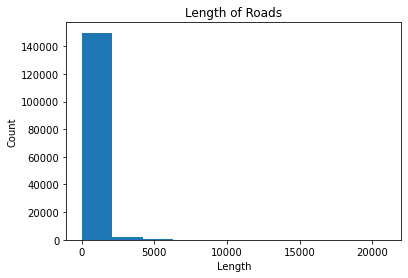

In [20]:
plt.hist(edges['length'])
plt.title('Length of Roads')
plt.xlabel('Length') 
plt.ylabel('Count');

## Missing data percentage and count for each attribute

In [21]:
percent = (edges.isnull().sum()/edges.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = edges.isna().sum().sort_values(ascending = False)
missing_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
missing_data.head(20)

,Percent,Missing Count
service,100.00,152585
est_width,100.00,152583
tunnel,99.99,152569
width,99.96,152533
junction,99.88,152405
access,99.72,152158
maxspeed,99.30,151514
bridge,98.46,150233
lanes,96.86,147800
ref,92.85,141672


# Export OSM data as cvs file

In [22]:
# df_edges.to_csv ('Haiti_Roads_OSM.csv', header=True)

# Data Scource 2 - Humdata
## https://data.humdata.org/dataset/haiti-roads

In [23]:
import pandas as pd
df2 = pd.read_csv('hti_polbndl_rd_cnigs.csv')

basic_eda(df2, "Haiti Roads Data from OSM")


************************** Haiti Roads Data from OSM ******************************

Performing basic EDA on Haiti Roads Data from OSM dataset

* The dataset has 78148 rows and 5 columns.

* First 10 rows of the dataset:



,#cod_section,# names,#name_section,#geo+lat,#geo+lon
0,NaN,NaN,NaN,0.000000,0.000000e+00
1,NaN,NaN,NaN,0.000000,0.000000e+00
2,NaN,NaN,NaN,0.000000,0.000000e+00
3,NaN,NaN,NaN,0.000000,0.000000e+00
4,NaN,NaN,NaN,0.000000,0.000000e+00
5,NaN,NaN,NaN,0.000000,0.000000e+00
6,NaN,NaN,NaN,0.000000,0.000000e+00
7,TN0000000000001,NaN,NaN,615423.003326,1.997798e+06
8,TN0000000000002,NaN,NaN,625431.447204,1.998799e+06
9,NaN,Departementale,RD52,0.000000,0.000000e+00



* Describing the dataset statistics:



,#geo+lat,#geo+lon
count,78148.000000,7.814800e+04
mean,38567.332259,1.079837e+05
std,166681.650162,4.648984e+05
min,0.000000,0.000000e+00
25%,0.000000,0.000000e+00
50%,0.000000,0.000000e+00
75%,0.000000,0.000000e+00
max,849629.998966,2.219495e+06



* Fetching info of the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78148 entries, 0 to 78147
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   #cod_section   4004 non-null   object 
 1   # names        705 non-null    object 
 2   #name_section  608 non-null    object 
 3   #geo+lat       78148 non-null  float64
 4   #geo+lon       78148 non-null  float64
dtypes: float64(2), object(3)
memory usage: 3.0+ MB


None

In [24]:
df2.columns

Index(['#cod_section', '# names', '#name_section', '#geo+lat', '#geo+lon'], dtype='object')

In [25]:
df2['# names'].value_counts()

Departementale         272
RN1: Nationale no 1     98
RN2: Nationale no 2     89
RN3: Nationale no 3     76
RN6: Nationale no 6     47
RN5: Nationale no 5     40
RN8: Nationale no 8     22
RN7: Nationale no 7     22
NC                      20
RN4: Nationale no 4      8
Route Lillavois          4
R9                       3
Route Rail               3
RC                       1
Name: # names, dtype: int64

In [26]:
df2['#name_section'].value_counts()

RN1                        98
RN2                        88
RN3                        76
RN6                        47
RD52                       33
RD25                       28
RD12                       28
RN5                        24
RN8                        22
RN7                        22
RD41                       19
RD11                       16
RD31                       15
RD32                       12
RD42                       11
RD51                       10
RD13                       10
RD21                        7
RD14                        7
RN4 (Route de l'AmitiΘ)     6
RD72                        5
RD81                        5
RD24                        4
RD53                        4
RD22                        3
RD71                        3
RN4                         2
Rd51                        1
Rd42                        1
RD23                        1
Name: #name_section, dtype: int64

# Document your data selection deceisions 

# Haiti printed/scanned map from IU librian

# IU super computing option

# breakdown a base layer, random select, verify OSM to is more accurate

# near tool in ArcGIS

# IU planet access, be more accurate, 



In [20]:
# Get Edges and Nodes
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

In [54]:
# Check crs
print("Coordinate system:", edges_proj.crs)

Coordinate system: +proj=utm +zone=18 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


In [55]:
# First rows
edges_proj.head()

osmid  oneway                    name  \
u          v          key                                             
258604112  621694911  0    30951697    True  Boulevard Harry Truman   
           6695612844 0    48229774   False           Rue Bonne Foi   
           6695612843 0    48330154   False     Boulevard la Saline   
621694911  258604192  0    30951697    True  Boulevard Harry Truman   
6695612844 612969262  0    48229774   False           Rue Bonne Foi   

                                highway   length  \
u          v          key                          
258604112  621694911  0       secondary   16.086   
           6695612844 0    unclassified   44.642   
           6695612843 0       secondary   48.580   
621694911  258604192  0       secondary  252.976   
6695612844 612969262  0    unclassified   33.082   

                                                                    geometry  \
u          v          key                                                      
258604112  621694911  0    LINESTRING (779909.922 2053210.843, 779902.664...   
           6695612844 0    LINESTRING (779909.922 2053210.843, 779953.050...   
           6695612843 0    LINESTRING (779909.922 2053210.843, 779923.642...   
621694911  258604192  0    LINESTRING (779902.664 2053196.536, 779892.443...   
6695612844 612969262  0    LINESTRING (779953.050 2053199.051, 779985.009...   

                          lanes bridge width  ref junction access maxspeed  
u          v          key                                                   
258604112  621694911  0     NaN    NaN   NaN  NaN      NaN    NaN      NaN  
           6695612844 0     NaN    NaN   NaN  NaN      NaN    NaN      NaN  
           6695612843 0     NaN    NaN   NaN  NaN      NaN    NaN      NaN  
621694911  258604192  0     NaN    NaN   NaN  NaN      NaN    NaN      NaN  
6695612844 612969262  0     NaN    NaN   NaN  NaN      NaN    NaN      NaN

Okay, as we can see from the CRS the data is now in [UTM projection](https://en.wikipedia.org/wiki/Universal_Transverse_Mercator_coordinate_system) using zone 35 which is the one used for Finland, and indeed the orientation of the map and the geometry values also confirm this.


Furthermore, we can check the epsg code of this projection using pyproj CRS:

In [56]:
CRS(edges_proj.crs).to_epsg()

32618

Indeed, the projection is now [WGS 84 / UTM zone 35N, EPSG:32635](https://epsg.io/32635).

## Analyzing the network properties

Now as we have seen some of the basic functionalities of OSMnx such as downloading the data and converting data from graph to GeoDataFrame, we can take a look some of the analytical features of omsnx. Osmnx includes many useful functionalities to extract information about the network.

To calculate some of the basic street network measures we can use [basic_stats()](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.stats.basic_stats) function in OSMnx:

In [57]:
# Calculate network statistics
stats = ox.basic_stats(graph_proj, circuity_dist='euclidean')
stats

{'n': 12913,
 'm': 32454,
 'k_avg': 5.026562378997909,
 'intersection_count': 9635,
 'streets_per_node_avg': 2.5903353209943467,
 'streets_per_node_counts': {0: 0, 1: 3278, 2: 2, 3: 8372, 4: 1254, 5: 7},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.2538527065747696,
  2: 0.0001548826763726477,
  3: 0.6483388832959034,
  4: 0.09711143808565012,
  5: 0.000542089367304267},
 'edge_length_total': 4385910.448999984,
 'edge_length_avg': 135.142369168669,
 'street_length_total': 2239063.0790000022,
 'street_length_avg': 133.9473007298398,
 'street_segments_count': 16716,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.1127359694111068,
 'self_loop_proportion': 0.0007703210698219018,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

To be able to extract the more advanced statistics (and some of the missing ones above) from the street network, it is required to have information about the coverage area of the network. Let's calculate the area of the [convex hull](https://en.wikipedia.org/wiki/Convex_hull) of the street network and see what we can get.



Great, now we have saved all the data that was used to produce the maps as Shapefiles.